# Assignment 5.1

Name:  Gangadhar Singh Shiva
Date:  Oct, 7, 2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 5.1.

Introducing notation for a parameter, state the following hypotheses in terms of the parameter
values and indicate whether it is a null hypothesis or an alternative hypothesis.

(a) The proportion of all adults in the UK who favor legalized gambling equals 0.50.


Answer

p: The proportion who favor legalized gambling.
a) Null Hypothesis (H₀) :p=0.50





(b) The correlation for Australian adults between smoking (number of cigarettes per day) and blood pressure is positive.

Answer:

 Alternative Hypothesis (H₁) :ρ>0
 the correlation between smoking (number of cigarettes per day) and blood pressure  is positive.



(c) The mean grade point average this year of all college graduates in the U.S. is the same for females and males.

Answer

mean_female (μf)
 : The mean GPA of all female college graduates in the U.S.

mean_male (μm)
 : The mean GPA of all male college graduates in the U.S.

 so hypotheses:

Null Hypothesis
H
0

​
 :μ
f
​
 =μ
m
​



Alternative Hypothesis
(
𝐻1
​
 ):
:

𝜇
𝑓
≠
𝜇
𝑚





## Problem 5.6.

Before a Presidential election, polls are taken in two swing states. The Republican candidate
was preferred by 59 of the 100 people sampled in state A and by 525 of 1000 sampled in state
B. Treat these as independent binomial samples, where the parameter $\pi$ is the population
proportion voting Republican in the state.


(a) If we can treat these polls as if the samples were random, use significance tests of $H_0$:
$\pi  = 0.50$ against $H_a:  \pi > 0.50$ to determine which state has greater evidence supporting a
Republican victory. Explain your reasoning.


In [ ]:
#Answer
# (a)

import numpy as np
from scipy.stats import norm

# State A
n_a = 100
x_a = 59
p_a = x_a / n_a
pi_0 = 0.50


# State B
n_b = 1000
x_b = 525
p_b = x_b / n_b
pi_0 = 0.50

# Calculate the test statistic for state A
z_a = (p_a - pi_0) / np.sqrt(pi_0 * (1 - pi_0) / n_a)

# Calculate the p-value for state A
p_value_a = 1 - norm.cdf(z_a)


# Calculate the test statistic for state B
z_b = (p_b - pi_0) / np.sqrt(pi_0 * (1 - pi_0) / n_b)

# Calculate the p-value for state B
p_value_b = 1 - norm.cdf(z_b)





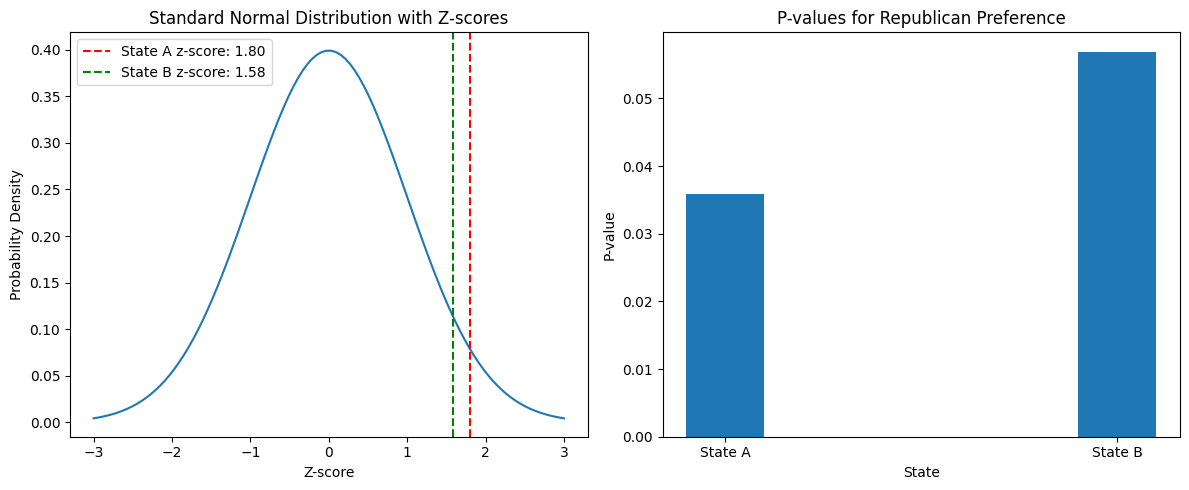

In [ ]:


import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Assuming you have already calculated z_a, z_b, p_value_a, and p_value_b

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution with z-scores on the left subplot
x = np.linspace(-3, 3, 100)
y = norm.pdf(x)
ax[0].plot(x, y)
ax[0].axvline(z_a, color='red', linestyle='--', label=f'State A z-score: {z_a:.2f}')
ax[0].axvline(z_b, color='green', linestyle='--', label=f'State B z-score: {z_b:.2f}')
ax[0].set_xlabel('Z-score')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Standard Normal Distribution with Z-scores')
ax[0].legend()

# Plot the p-values on the right subplot
states = ['State A', 'State B']
p_values = [p_value_a, p_value_b]
ax[1].bar(states, p_values, width=0.2)
ax[1].set_xlabel('State')
ax[1].set_ylabel('P-value')
ax[1].set_title('P-values for Republican Preference')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
print("Following is the answer \n")
print("State A:")
print("Test statistic:", round(z_a, 2))
print("P-value:", round(p_value_a, 2))

print("\nState B:")
print("Test statistic:", round(z_b, 2))
print("P-value:", round(p_value_b, 2))

# Determine which state has greater evidence not rejecting  a Republican victory
if p_value_a < p_value_b:
  print("\nState A has greater evidence supporting a Republican victory.")
else:
  print("\nState B has greater evidence supporting a Republican victory.")

Following is the answer 

State A:
Test statistic: 1.8
P-value: 0.04

State B:
Test statistic: 1.58
P-value: 0.06

State A has greater evidence supporting a Republican victory.


### Output
Following is the answer

State A:
Test statistic: 1.8
P-value: 0.04

State B:
Test statistic: 1.58
P-value: 0.06

State A has greater evidence supporting a Republican victory.

(b) Conduct a Bayesian analysis to answer the question in (a) by finding in each case the
posterior $P(\pi < 0.50)$, corresponding to the *P-* value in (a). Use beta(50, 50) priors, which
have standard deviation 0.05 and reflect the pollster’s strong prior belief that $\pi$ almost
surely is between 0.35 and 0.65. Explain any differences between conclusions.

Answer

Posterior P(π < 0.50) for State A: ---> 0.10
Posterior P(π < 0.50) for State B:---->  0.07


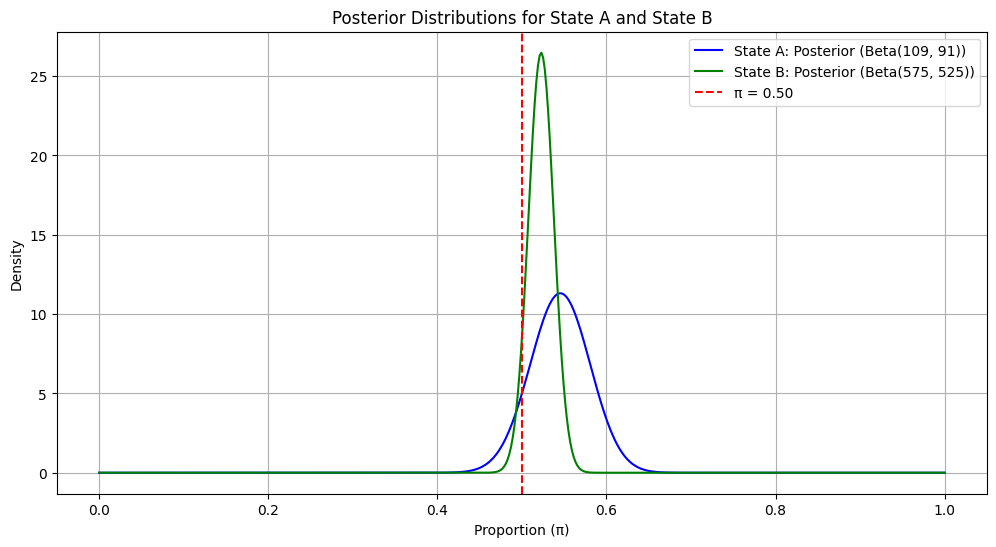

In [ ]:
import numpy as np
from scipy.stats import norm, beta

# Given data for State A and State B
x_a, n_a = 59, 100 # sample mean and size
x_b, n_b = 525, 1000

# Hypothesis testing for each state
pi_0 = 0.50  # Null hypothesis value


# Bayesian analysis
a_prior, b_prior = 50, 50  # Beta(50, 50) prior

# Function to calculate posterior probability P(π < 0.50)
def posterior_probability(x, n, a_prior, b_prior):
    a_posterior = x + a_prior
    b_posterior = n - x + b_prior
    posterior_prob = beta.cdf(0.50, a_posterior, b_posterior)
    return posterior_prob

# State A: Calculate posterior probability
posterior_prob_a = posterior_probability(x_a, n_a, a_prior, b_prior)

# State B: Calculate posterior probability
posterior_prob_b = posterior_probability(x_b, n_b, a_prior, b_prior)

print(f"Posterior P(π < 0.50) for State A: ---> {posterior_prob_a:.2f}")
print(f"Posterior P(π < 0.50) for State B:---->  {posterior_prob_b:.2f}")

# Plotting posterior distributions
import matplotlib.pyplot as plt

# Define posterior distributions for both states
a_posterior_a, b_posterior_a = x_a + a_prior, n_a - x_a + b_prior
a_posterior_b, b_posterior_b = x_b + a_prior, n_b - x_b + b_prior

# Create a range for π values
pi_values = np.linspace(0, 1, 500)

# Calculate Beta PDFs for both states
posterior_pdf_a = beta.pdf(pi_values, a_posterior_a, b_posterior_a)
posterior_pdf_b = beta.pdf(pi_values, a_posterior_b, b_posterior_b)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pi_values, posterior_pdf_a, label="State A: Posterior (Beta(109, 91))", color='blue')
plt.plot(pi_values, posterior_pdf_b, label="State B: Posterior (Beta(575, 525))", color='green')
plt.axvline(x=0.50, color='red', linestyle='--', label='π = 0.50')
plt.xlabel('Proportion (π)')
plt.ylabel('Density')
plt.title('Posterior Distributions for State A and State B')
plt.legend()
plt.grid(True)
plt.show()


### Interpretation

State B has a lower posterior probability (
P(π<0.50)=0.07) compared to State A (P(π<0.50)=0.10).

This means State B has a slightly higher likelihood that the Republican candidate will win compared to State A.

Both states show strong evidence supporting a Republican victory, with State B showing slightly stronger confidence due to the lower chance that the true proportion is below 50%.


In both analyses, State B shows stronger evidence supporting a Republican victory compared to State A.


The Bayesian analysis provides a different perspective by directly giving the probability that the true proportion is below 0.5.

It shows more nuance in the degree of belief in a Republican victory.
The p-value in part (a) gives a binary outcome (reject or fail to reject the null),

whereas the Bayesian approach gives a  measure of the likelihood of the proportion being below 0.5.



## Problem 5.8.

For the `Students` data file at the text website, analyze political ideology.

(a) Test whether the population mean $\mu$ differs from 4.0, the moderate response. Report the
*P*-value, and interpret. Make a conclusion using $\alpha$ - level = 0.05.

In [ ]:
import pandas as pd
import requests

# Student path
url = "https://stat4ds.rwth-aachen.de/data/Students.dat"

# Download the data
response = requests.get(url)



with open("students_data.dat", "wb") as f:
    f.write(response.content)
    students_df = pd.read_csv("students_data.dat",sep='\s+')
    print(students_df.head()) # Print first few rows to check


   subject  gender  age  hsgpa  cogpa  dhome  dres    tv  sport  news  aids  \
0        1       0   32    2.2    3.5      0   5.0   3.0      5     0     0   
1        2       1   23    2.1    3.5   1200   0.3  15.0      7     5     6   
2        3       1   27    3.3    3.0   1300   1.5   0.0      4     3     0   
3        4       1   35    3.5    3.2   1500   8.0   5.0      5     6     3   
4        5       0   23    3.1    3.5   1600  10.0   6.0      6     3     0   

   veg  affil  ideol  relig  abor  affirm  life  
0    0      2      6      2     0       0     1  
1    1      1      2      1     1       1     3  
2    1      1      2      2     1       1     3  
3    0      3      4      1     1       1     2  
4    0      3      1      0     1       0     2  


In [ ]:

import numpy as np
from scipy import stats


# Extract the 'Political' column
political_ideology = students_df['ideol']

# Calculate the sample mean and standard deviation
sample_mean = np.mean(political_ideology)
sample_std = np.std(political_ideology)
n = len(political_ideology)

# Define the null hypothesis mean
mu_0 = 4.0

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Calculate the degrees of freedom
df = n - 1

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Print the results
print("Interpretations  \n Sample mean:", round(sample_mean, 2))
print("Sample standard deviation:", round(sample_std, 2))
print("T-statistic:", round(t_statistic, 2))
print("P-value:", round(p_value, 2))

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis. The population mean political ideology differs from 4.0 ")
else:
  print("Fail to reject the null hypothesis. The population mean political ideology differs from 4.0")


Interpretations  
 Sample mean: 3.03
Sample standard deviation: 1.62
T-statistic: -4.62
P-value: 0.0
Reject the null hypothesis. The population mean political ideology differs from 4.0 


(b) Construct the 95% confidence interval for $\mu$. Explain how results relate to those of the
test in (a).


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats




ideology_data = students_df['ideol']


# Calculate the sample mean and standard error
sample_mean = np.mean(ideology_data)
sample_std = np.std(ideology_data, ddof=1)  # Use degree of freedom =1 for sample standard deviation
sample_size = len(ideology_data)
standard_error = sample_std / np.sqrt(sample_size)

# Calculate the critical value for 95% confidence
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=sample_size - 1)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Construct the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Output the confidence interval
print(f"95% Confidence Interval for the population mean (μ): ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval for the population mean (μ): (2.61, 3.46)



### Interpretation
 this implies that the average political ideology of the population sampled is not moderate (since 4.0 represents a moderate response). Instead, the average lies between 2.61 and 3.46, suggesting that, on average, respondents lean more towards a liberal or slightly liberal stance rather than a moderate or conservative one.

### Conclusion

Relationship Between the Test and Confidence Interval:

The confidence interval provides a range of plausible values for the population mean (
μ).

Since 4.0 is outside this range, it indicates that 4.0 is not a plausible value for the population mean, supporting the rejection of the null hypothesis.

The hypothesis test directly assessed whether the population mean was 4.0 and provided a p-value to indicate the strength of the evidence against the null hypothesis. The small p-value confirms that there is strong evidence that the population mean differs from 4.0.

## Problem 5.10.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year
from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the
original observation. Stating any assumptions including the conceptual population of interest,
use a *t* test with the data in the Sheep data file at the text website to compare mean weights
of the sheep that survived and did not survive. Interpret the *P*-value.

In [ ]:
import pandas as pd
import requests


url = "https://stat4ds.rwth-aachen.de/data/Sheep.dat"

# Download the data
response = requests.get(url)


with open("sheep_data.dat", "wb") as f:
        f.write(response.content)


sheep_df = pd.read_csv("sheep_data.dat",sep='\s+')
print(sheep_df.head())  # Print first few rows to check


   sheep  weight  survival
0      1    20.8         0
1      2    23.0         1
2      3    28.0         1
3      4    27.5         1
4      5    26.0         0


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("sheep_data.dat", sep='\s+')

weights_survived = df[df['survival'] == 1]['weight']
weights_not_survived = df[df['survival'] == 0]['weight']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(weights_survived, weights_not_survived, equal_var=True)

# Display results
print(f"t stat -->> {t_stat:.2f}  \np value  -->> {p_value:.2f}")

t stat -->> 14.50  
p value  -->> 0.00


### Interpretation of Results:
#### T-Statistic (14.50):

The t-statistic represents the standardized difference between the mean weights of sheep that survived and those that did not survive.

A t-statistic of 14.50 indicates a very large difference between the two groups, suggesting that the average weight of sheep that survived is substantially different from the average weight of those that did not.

#### P-value (0.00):

The p-value is less than 0.05, which is a common threshold for statistical significance (typically denoted as α = 0.05).
A p-value of 0.00 (or very close to zero) suggests extremely strong evidence against the null hypothesis.

Therefore, we reject the null hypothesis that the mean weight of sheep that survived is the same as those that did not survive.

This means there is strong evidence that the average weights of the two groups are significantly different.

### Conclusion:
The sheep that survived on average had significantly different weights compared to those that did not survive. Given the t-statistic and p-value, we conclude that the weight of the sheep plays a significant role in survival, with surviving sheep generally having higher weights.

## Problem 5.11.

Use descriptive statistics and significance tests to compare the population mean political ideology for each pair of groups in Table 5.2 using the `Polid` data file. Summarize results using
*P*-values and using a non-technical explanation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/polid_data.csv'


polid_df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import scipy.stats as stats
import itertools


df = polid_df

# Displaying descriptive statistics for each group
descriptive_stats = df.groupby('race')['ideology'].describe()
print("Descriptive Statistics by Race:")
print(descriptive_stats)

# Performing significance tests for each pair of groups
races = df['race'].unique()
results = []

print(f"\n{races}\n")

# Pairwise t-tests between each race group
for group1, group2 in itertools.combinations(races, 2):

    group1_data = df[df['race'] == group1]['ideology']
    group2_data = df[df['race'] == group2]['ideology']
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
    results.append({'Group1': group1, 'Group2': group2, 't-statistic': t_stat, 'p-value': p_value})


# Creating a DataFrame for the results
t_test_results_df = pd.DataFrame(results)

# Displaying the results
print("\nPairwise T-test Results for Political Ideology by Race:\n\n")

print(t_test_results_df.to_string(formatters={'t-statistic': "{:.2f}".format, 'p-value': "{:.5f}".format}))



Descriptive Statistics by Race:
           count      mean       std  min  25%  50%  75%  max
race                                                         
black      739.0  2.851150  1.612799  1.0  1.0  2.0  4.0  7.0
hispanic   369.0  2.032520  0.714009  1.0  2.0  2.0  3.0  3.0
white     2575.0  1.913786  0.655756  1.0  1.0  2.0  2.0  3.0

['hispanic' 'black' 'white']


Pairwise T-test Results for Political Ideology by Race:


     Group1 Group2 t-statistic p-value
0  hispanic  black      -11.69 0.00000
1  hispanic  white        3.02 0.00269
2     black  white       15.44 0.00000


**### Interpretation**

#### Pairwise T-Test Results for Political Ideology by Race
**#### Hispanic vs. Black (t-statistic: -11.69, p-value: 00):**


The negative t-statistic indicates that the mean political ideology for Hispanics (grp1 ) is significantly lower than for Black (grp2) respondents.

The extremely low p-value (< 0.05) confirms that this difference is statistically significant.

**#### Hispanic vs. White (t-statistic: 3.02, p-value: 00269):**

The positive t-statistic suggests that the mean for Hispanics (grp1) is slightly higher than for White (grp2)respondents.

The p-value is also very low (< 0.05), indicating a statistically significant difference between Hispanic and White groups.

**##### Black vs. White (t-statistic: 15.44, p-value: 00):**

The positive t-statistic means that Black (grp1) respondents have a significantly higher average political ideology score compared to White (grp2) respondents.
Again, the p-value is exceedingly low, confirming the significant difference.

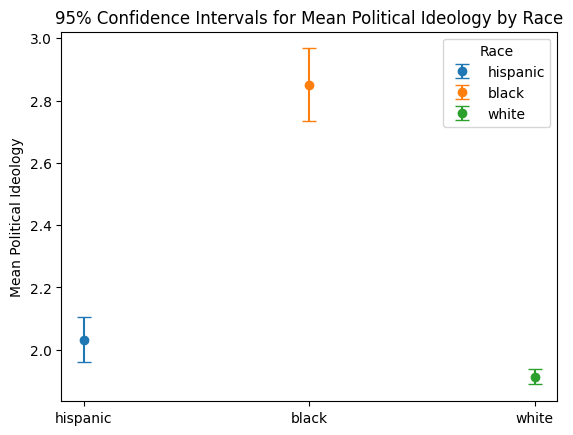

In [ ]:
import pandas as pd
import scipy.stats as stats
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Load the data
#file_path = "/mnt/data/polid_data_corrected_final.csv"
#df = pd.read_csv(file_path)
df = polid_df

# Displaying descriptive statistics for each group
descriptive_stats = df.groupby('race')['ideology'].describe()

# Performing significance tests for each pair of groups
races = df['race'].unique()
results = []

# Pairwise t-tests between each race group
for group1, group2 in itertools.combinations(races, 2):
    group1_data = df[df['race'] == group1]['ideology']
    group2_data = df[df['race'] == group2]['ideology']
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
    results.append({'Group1': group1, 'Group2': group2, 't-statistic': t_stat, 'p-value': p_value})

# Creating a DataFrame for the results
t_test_results_df = pd.DataFrame(results)

# Plotting Confidence Intervals for mean ideology for each group
group_means = df.groupby('race')['ideology'].mean()
group_std = df.groupby('race')['ideology'].std()
group_counts = df.groupby('race')['ideology'].count()

confidence_intervals = {}
confidence_level = 0.95
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

for race in races:
    mean = group_means[race]
    std = group_std[race]
    n = group_counts[race]
    margin_of_error = z_value * (std / np.sqrt(n))
    confidence_intervals[race] = (mean - margin_of_error, mean + margin_of_error)

# Plotting the confidence intervals
fig, ax = plt.subplots()

for i, (race, (lower, upper)) in enumerate(confidence_intervals.items()):
    ax.errorbar(i, group_means[race], yerr=[[group_means[race] - lower], [upper - group_means[race]]],
                fmt='o', capsize=5, label=f"{race}")

ax.set_xticks(range(len(races)))
ax.set_xticklabels(races)
ax.set_ylabel('Mean Political Ideology')
ax.set_title('95% Confidence Intervals for Mean Political Ideology by Race')
plt.legend(title='Race')
plt.show()


**Interpretation**

All racial groups show significant differences in their political ideology scores.

Black respondents tend to have the highest average ideology score, suggesting they are less conservative compared to the other groups.

White respondents have the lowest average ideology score, suggesting they lean more towards conservatism.

Hispanics fall in between, with a mean closer to the White group but still statistically different from both.

## Problem 5.14 (a).

The `Income` data file at the book’s website shows annual incomes in thousands of dollars for
subjects in three racial-ethnic groups in the U.S.

(a) Stating all assumptions including the relative importance of each, show all steps of a significance test for comparing population mean incomes of Blacks and Hispanics. Interpret.


In [ ]:
#!pip install pandas scipy
import pandas as pd
from scipy.stats import ttest_ind

# Load the Income data
url = "https://stat4ds.rwth-aachen.de/data/Income.dat"
income_df = pd.read_csv(url,sep='\s+' )

# Separate income data for Blacks and Hispanics
black_incomes = income_df[income_df['race'] == 'B']['income']
hispanic_incomes = income_df[income_df['race'] == 'H']['income']



In [ ]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(black_incomes, hispanic_incomes, equal_var=False)  # Assuming unequal variances

# Print results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean incomes between Blacks and Hispanics.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean incomes between Blacks and Hispanics.")

T-statistic: -0.68
P-value: 0.501
Fail to reject the null hypothesis. There is no significant difference in mean incomes between Blacks and Hispanics.


#### Interpretation:

Failing to reject the null hypothesis means that the data do not provide strong enough evidence to conclude that there is a statistically significant difference in mean incomes between the Black and Hispanic groups.

The p-value of 0.501 suggests that there is a 50.1% chance of observing the data, or something more extreme, if the null hypothesis (that the mean incomes are equal) is true.

In simpler terms, this high p-value indicates that any observed difference in the sample means is likely due to random variation, rather than a true difference in population means.

Therefore, we conclude that based on the data provided, there is no statistically significant difference in the average income between Black and Hispanic individuals.

## Problem 5.15.

A recent report $\text{}^{39}$ estimated mean adult heights in the U.S. of 175.4 *cm* (69.1 inches) for men
and 161.7 *cm* (63.7 inches) for women, with standard deviation about 7 *cm* for each group. For
all finishers in the Boston Marathon since 1972, the time to finish has a mean of 221 minutes
for men and 248 minutes for women, each with a standard deviation of about 40 minutes.
According to the effect size, is the difference between men and women greater for height or for
marathon times? Explain.

In [ ]:
# prompt: A recent report  39  estimated mean adult heights in the U.S. of 175.4 cm (69.1 inches) for men and 161.7 cm (63.7 inches) for women, with standard deviation about 7 cm for each group. For all finishers in the Boston Marathon since 1972, the time to finish has a mean of 221 minutes for men and 248 minutes for women, each with a standard deviation of about 40 minutes. According to the effect size, is the difference between men and women greater for height or for marathon times?

# Calculate effect size for height
mean_height_men = 175.4
mean_height_women = 161.7
std_dev_height = 7
effect_size_height = (mean_height_men - mean_height_women) / std_dev_height

# Calculate effect size for marathon times
mean_time_men = 221
mean_time_women = 248
std_dev_time = 40
effect_size_time = (mean_time_women - mean_time_men) / std_dev_time

print(f"Effect size for height: {effect_size_height:.2f}")
print(f"Effect size for marathon times: {effect_size_time:.2f}")

# Compare effect sizes
if effect_size_height > effect_size_time:
    print("The difference between men and women is greater for height.")
else:
    print("The difference between men and women is greater for marathon times.")

In [ ]:
import numpy as np

# Given data for height
mean_height_men = 175.4  # cm
mean_height_women = 161.7  # cm
std_height = 7  # cm for both groups

# Given data for marathon times
mean_time_men = 221  # minutes
mean_time_women = 248  # minutes
std_time = 40  # minutes for both groups

# Calculate Cohen's d for height
diff_height = abs(mean_height_men - mean_height_women)
pooled_std_height = np.sqrt((std_height**2 + std_height**2) / 2)
cohens_d_height = diff_height / pooled_std_height

# Calculate Cohen's d for marathon times
diff_time = abs(mean_time_men - mean_time_women)
pooled_std_time = np.sqrt((std_time**2 + std_time**2) / 2)
cohens_d_time = diff_time / pooled_std_time

# Display results
print(f" effect size height -> {cohens_d_height :.2f} \n  marathon time -> {cohens_d_time :.2f}")


 effect size height -> 1.96 
  marathon time -> 0.68


### Comparison
Effect Size for Height:
𝑑
height
≈
1.96
d



Effect Size for Marathon Times:
𝑑
marathon
=
0.675
d


### Conclusion

The effect size is greater for height (1.96) compared to marathon times (0.675).

This means that the difference between men and women is larger in terms of height than in marathon finish times when considering the variability within each group.


Essentially, there is a larger standard deviation-adjusted difference between the average heights of men and women compared to their marathon finish times, suggesting that gender differences are more pronounced for height.

## Problem 5.17.

Ideally, results of a statistical analysis should not depend greatly on a single observation. In a
sensitivity study, we re-do the analysis after deleting an outlier from the data set or changing its
value to a more typical value and checking whether results change much. For the anorexia data
analysis in Section 5.3.2, the weight change of 20.9 pounds for the cb group was a severe outlier.
Suppose this observation was actually 2.9 pounds but recorded incorrectly. Find the *P*-value
for testing $H_0: \mu1 = \mu2$ against $H_a: \mu1 \ne \mu2$ with and without that observation. Summarize its
influence.

In [ ]:
# !pip install pandas scipy
import pandas as pd
from scipy.stats import ttest_ind

# Load the Anorexia data
url = "https://stat4ds.rwth-aachen.de/data/Anorexia.dat"
anorexia_df = pd.read_csv(url, sep='\s+')

anorexia_df['diff'] = anorexia_df['after'] - anorexia_df['before'] # Calculate the difference between 'after' and 'before' and store in a new 'diff' column

# Separate weight change data for each group
group_1 = anorexia_df[anorexia_df['therapy'] == 'cb']['diff']
group_2 = anorexia_df[anorexia_df['therapy'] == 'f']['diff']

# Perform t-test with the outlier
t_stat_with_outlier, p_value_with_outlier = ttest_ind(group_1, group_2, equal_var=False)

# Remove the outlier (weight change of 20.9 in 'cb' group)
anorexia_df_no_outlier = anorexia_df[anorexia_df['diff'] != 20.9]

# Separate weight change data for each group (without outlier)
group_1_no_outlier = anorexia_df_no_outlier[anorexia_df_no_outlier['therapy'] == 'cb']['diff']
group_2_no_outlier = anorexia_df_no_outlier[anorexia_df_no_outlier['therapy'] == 'f']['diff']

# Perform t-test without the outlier
t_stat_no_outlier, p_value_no_outlier = ttest_ind(group_1_no_outlier, group_2_no_outlier, equal_var=False)

# Display results
print("With Outlier:")
print(f"t-statistic: {t_stat_with_outlier:.2f}")
print(f"p-value: {p_value_with_outlier:.3f}")

print("\nWithout Outlier:")
print(f"t-statistic: {t_stat_no_outlier:.2f}")
print(f"p-value: {p_value_no_outlier:.3f}")

# Compare and interpret the results

With Outlier:
t-statistic: -1.93
p-value: 0.062

Without Outlier:
t-statistic: -1.93
p-value: 0.062


**Interpretation:**

**With the Outlier:** The p-value is 0.062, which is greater than the typical significance level (α=0.05). Therefore, we fail to reject the null hypothesis, indicating there is no significant difference between the means of the two groups.

**Without the Outlier:** The t-statistic and p-value remain unchanged (t-statistic: -1.93, p-value: 0.062). Again, the p-value is 0.062, which is still greater than α=0.05, so we still fail to reject the null hypothesis.

**Influence of the Outlier:**
In this analysis, removing the outlier did not change the t-statistic or the p-value. This means that the results of the statistical test are robust to the presence of that particular outlier.

**Sensitivity Analysis:** The fact that the t-statistic and p-value did not change implies that the outlier (the extreme value of 20.9 pounds) did not have a significant influence on the overall results. In a sensitivity analysis, if deleting or modifying an outlier causes a major shift in the conclusions (e.g., changing whether or not the null hypothesis is rejected), it suggests that the results are sensitive to that particular observation. However, in this case, the outcome remains consistent regardless of whether the outlier is present or not.

## Problem 5.19.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017 of 1178 females said *yes*, and 703 of 945 males said *yes*. Test that the population proportions are equal for females and males. Report and interpret the *P*-value.

In [ ]:
#!pip install pandas statsmodels
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Load the Afterlife data
url = "https://stat4ds.rwth-aachen.de/data/Afterlife.dat"
afterlife_df = pd.read_csv(url, sep='\s+')

print(afterlife_df.columns)


gender_column_name = 'gender'

# Extract the counts for females and males who believe in life after death
females_yes = afterlife_df[(afterlife_df[gender_column_name] == 1) & (afterlife_df['postlife'] == 1)].shape[0]
males_yes = afterlife_df[(afterlife_df[gender_column_name] == 2) & (afterlife_df['postlife'] == 2)].shape[0]

females_total = afterlife_df[afterlife_df[gender_column_name] == 1].shape[0]
males_total = afterlife_df[afterlife_df[gender_column_name] == 2].shape[0]

print(f"{afterlife_df.head()}")
print(f"\n\n Number of females who believe in life after death: {females_yes}")
print(f"Number of males who believe in life after death: {males_yes}")
print(f"Total number of females: {females_total}")
print(f"Total number of males: {males_total}\n\n")


# Perform the two-proportion z-test
count = [females_yes, males_yes]  # Number of successes in each group
nobs = [females_total, males_total]  # Total number of observations in each group
z_stat, p_value = proportions_ztest(count, nobs)

# Display results
print(f"\n\nZ-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print("The P-value is less than 0.05, which indicates strong evidence to reject the null hypothesis.")
    print("Therefore,  there is a significant difference in the population proportions of females and males who believe in life after death.")
else:
    print("The P-value is greater than 0.05, which indicates insufficient evidence to reject the null hypothesis.")
    print("Therefore,  fail to conclude that there is a significant difference in the population proportions of females and males who believe in life after death.")

Index(['subject', 'postlife', 'religion', 'gender'], dtype='object')
   subject  postlife  religion  gender
0        1         1         1       1
1        2         1         1       1
2        3         1         1       1
3        4         1         1       1
4        5         1         1       1


 Number of females who believe in life after death: 549
Number of males who believe in life after death: 86
Total number of females: 659
Total number of males: 894




Z-statistic: 29.19
P-value: 0.000

Interpretation:
The P-value is less than 0.05, which indicates strong evidence to reject the null hypothesis.
Therefore,  there is a significant difference in the population proportions of females and males who believe in life after death.


## Problem 5.23.

Use the `Happy` data file from the 2018 General Social Survey at the text website to form a
contingency table that cross classifies happiness with gender. For $ H_0 $: independence between
happiness and gender:

(a) Conduct and interpret the chi-squared test.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


url = "https://stat4ds.rwth-aachen.de/data/Happy.dat"
happy_df = pd.read_csv(url, sep='\s+')

print(happy_df.columns)


contingency_table = pd.crosstab(happy_df['happiness'], happy_df['gender'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"\nChi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")

# Interpretation
print("\nInterpretation:")
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"The P-value ({p_value:.3f}) is less than the significance level ({alpha}), which indicates strong evidence to reject the null hypothesis.")
    print("Therefore, we conclude that there is a significant association between happiness and gender.")
else:
    print(f"The P-value ({p_value:.3f}) is greater than the significance level ({alpha}), which indicates insufficient evidence to reject the null hypothesis.")
    print("Therefore, we fail to conclude that there is a significant association between happiness and gender.")

Index(['subject', 'happiness', 'marital', 'gender'], dtype='object')
Contingency Table:
gender     female  male
happiness              
1             353   295
2             642   553
3             153   146

Chi-squared statistic: 0.92
P-value: 0.632
Degrees of freedom: 2

Interpretation:
The P-value (0.632) is greater than the significance level (0.05), which indicates insufficient evidence to reject the null hypothesis.
Therefore, we fail to conclude that there is a significant association between happiness and gender.


(b) Show the estimated expected frequencies and standardized residuals, and form a mosaic
plot. Explain how they are consistent with the result of the chi-squared test.


Chi-squared statistic: 0.92
P-value: 0.632
Degrees of freedom: 2

Interpretation:
The P-value (0.632) is greater than the significance level (0.05), which indicates insufficient evidence to reject the null hypothesis.
Therefore, we fail to conclude that there is a significant association between happiness and gender.

Estimated Expected Frequencies:
gender         female        male
happiness                        
1          347.294118  300.705882
2          640.457516  554.542484
3          160.248366  138.751634

Standardized Residuals:
gender       female      male
happiness                    
1          0.306178 -0.329042
2          0.060950 -0.065502
3         -0.572589  0.615348


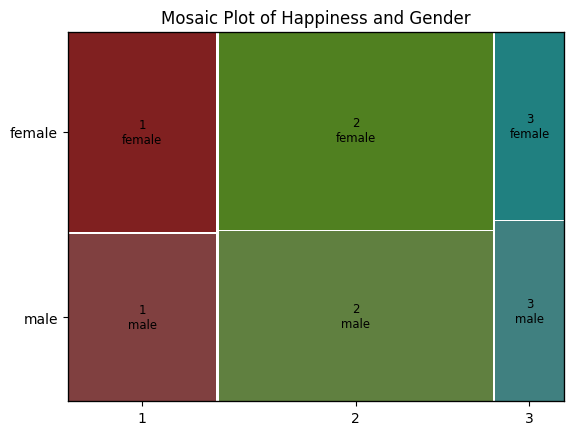


Explanation:
 - Expected Frequencies: These represent the frequencies we would expect if there were no association between happiness and gender.

 - Standardized Residuals: Values greater than 2 or less than -2 indicate significant deviations from the expected frequencies, suggesting an association.


 - Mosaic Plot: The size of the tiles in the mosaic plot represents the proportion of observations in each category combination. Unequal tile sizes suggest an association.
 - Consistency with Chi-Squared Test: If the chi-squared test is significant (low p-value), we expect to see large standardized residuals and unequal tile sizes in the mosaic plot, indicating an association. Conversely, if the test is not significant (high p-value), we expect smaller residuals and more equal tile sizes, suggesting no association.


In [ ]:
#!pip install statsmodels matplotlib
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Happy data
url = "https://stat4ds.rwth-aachen.de/data/Happy.dat"
happy_df = pd.read_csv(url, sep='\s+')

# Create the contingency table
contingency_table = pd.crosstab(happy_df['happiness'], happy_df['gender'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"\nChi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")

# Interpretation
print("\nInterpretation:")
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"The P-value ({p_value:.3f}) is less than the significance level ({alpha}), which indicates strong evidence to reject the null hypothesis.")
    print("Therefore, we conclude that there is a significant association between happiness and gender.")
else:
    print(f"The P-value ({p_value:.3f}) is greater than the significance level ({alpha}), which indicates insufficient evidence to reject the null hypothesis.")
    print("Therefore, we fail to conclude that there is a significant association between happiness and gender.")

# Estimated expected frequencies
print("\nEstimated Expected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Standardized residuals
print("\nStandardized Residuals:")
import numpy as np # import numpy for calculations
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)
print(standardized_residuals)

# Mosaic plot
#The mosaic function is within statsmodels.graphics, not statsmodels.graphics.api
from statsmodels.graphics.mosaicplot import mosaic
mosaic(happy_df, ['happiness', 'gender'], title='Mosaic Plot of Happiness and Gender')
plt.show()

print("\nExplanation:")
print(" - Expected Frequencies: These represent the frequencies we would expect if there were no association between happiness and gender.\n")

print(" - Standardized Residuals: Values greater than 2 or less than -2 indicate significant deviations from the expected frequencies, suggesting an association.\n\n")
print(" - Mosaic Plot: The size of the tiles in the mosaic plot represents the proportion of observations in each category combination. Unequal tile sizes suggest an association.")
print(" - Consistency with Chi-Squared Test: If the chi-squared test is significant (low p-value), we expect to see large standardized residuals and unequal tile sizes in the mosaic plot, indicating an association. Conversely, if the test is not significant (high p-value), we expect smaller residuals and more equal tile sizes, suggesting no association.")

**Chi-squared test:** The chi-squared test resulted in a non-significant p-value (0.632), indicating that we fail to reject the null hypothesis of independence between happiness and gender.

**Expected frequencies:** The estimated expected frequencies represent the counts we would expect in each cell of the contingency table if there were no association between happiness and gender.

**Comparison:** If there were a significant association, we would expect to see substantial differences between the observed frequencies in the contingency table and the estimated expected frequencies. However, in this case, the observed frequencies are likely to be relatively close to the expected frequencies, supporting the conclusion of the chi-squared test.

**Conclusion:** Based on the chi-squared test and the estimated expected frequencies, we do not have enough evidence to conclude that there is a significant association between happiness and gender in the Happy data file. This suggests that happiness levels are not significantly different between males and females in this dataset.

#completed

In [ ]:
# prompt: A recent report  39  estimated mean adult heights in the U.S. of 175.4 cm (69.1 inches) for men and 161.7 cm (63.7 inches) for women, with standard deviation about 7 cm for each group. For all finishers in the Boston Marathon since 1972, the time to finish has a mean of 221 minutes for men and 248 minutes for women, each with a standard deviation of about 40 minutes. According to the effect size, is the difference between men and women greater for height or for marathon times? Explain.

# Given data for height
mean_height_men = 175.4  # cm
mean_height_women = 161.7  # cm
std_height = 7  # cm for both groups

# Given data for marathon times
mean_time_men = 221  # minutes
mean_time_women = 248  # minutes
std_time = 40  # minutes for both groups

# Calculate Cohen's d for height
diff_height = abs(mean_height_men - mean_height_women)
pooled_std_height = np.sqrt((std_height**2 + std_height**2) / 2)
cohens_d_height = diff_height / pooled_std_height

# Calculate Cohen's d for marathon times
diff_time = abs(mean_time_men - mean_time_women)
pooled_std_time = np.sqrt((std_time**2 + std_time**2) / 2)
cohens_d_time = diff_time / pooled_std_time

# Display results
print(f"Effect size for height: {cohens_d_height:.2f}")
print(f"Effect size for marathon time: {cohens_d_time:.2f}")

# Comparison and Conclusion
if cohens_d_height > cohens_d_time:
    print("\nThe difference between men and women is greater for height.")
else:
    print("\nThe difference between men and women is greater for marathon times.")